# Analyzing Naming Trends using Python

In [24]:
import pandas as pd
import numpy as np

## Data Preview

In [5]:
names1880 = pd.read_csv("C:\\Users\\black\\Desktop\\PyforDS\\datasets\\babynames\\yob1880.txt", names=["name","sex","births"])

In [7]:
names1880.info

<bound method DataFrame.info of            name sex  births
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]>

In [8]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

## Assembling the Data

In [11]:
pieces = []
columns = ['name', 'sex', 'births']
years = range(1880, 2011)

In [14]:
for year in years:
    path = 'C:\\Users\\black\\Desktop\\PyforDS\\datasets\\babynames\\yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    names = pd.concat(pieces, ignore_index=True)

In [15]:
names.info

<bound method DataFrame.info of               name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1692316    Zymaire   M       5  2010
1692317     Zyonne   M       5  2010
1692318  Zyquarius   M       5  2010
1692319      Zyran   M       5  2010
1692320      Zzyzx   M       5  2010

[1692321 rows x 4 columns]>

In [17]:
names.to_pickle('names.pkl')

## Exploring the Data

In [19]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [20]:
total_births.tail()

sex,F,M
year,,
2006,1900190,2054166
2007,1921491,2074249
2008,1889593,2038796
2009,1835649,1982082
2010,1775986,1917177


<AxesSubplot:title={'center':'Total Births by sex and year'}, xlabel='year'>

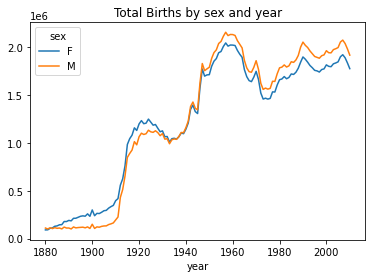

In [21]:
total_births.plot(title='Total Births by sex and year')

## Adding Proportion and Subsetting Top 100 Names

In [62]:
# group by year and sex
# add proportion of babies given certain name relative to number of births
def add_prop(group):
    # integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group


names = names.groupby(['year','sex']).apply(add_prop)

names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692316,Zymaire,M,5,2010,0.000003
1692317,Zyonne,M,5,2010,0.000003
1692318,Zyquarius,M,5,2010,0.000003
1692319,Zyran,M,5,2010,0.000003


In [63]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [70]:
top100 = names.sort_values(by="births", ascending=False)[:100]
top100

,name,sex,births,year,prop
431069,Linda,F,99693,1947,0.056238
441440,Linda,F,96212,1948,0.056667
437172,James,M,94764,1947,0.051798
544666,Michael,M,92718,1957,0.042997
437173,Robert,M,91647,1947,0.050094
...,...,...,...,...,...
478471,Michael,M,72801,1951,0.038665
604209,James,M,72548,1962,0.035070
579847,Robert,M,72351,1960,0.033934
191064,Mary,F,72176,1922,0.060097


## Naming Trends

In [29]:
top100.to_pickle('top100.pkl')

In [71]:
boys = top100[top100.sex == 'M']
girls = top100[top100.sex == 'F']
total_births = top100.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births

name,David,James,John,Linda,Mary,Michael,Robert
year,,,,,,,
1921,NaN,NaN,NaN,NaN,73985.0,NaN,NaN
1922,NaN,NaN,NaN,NaN,72176.0,NaN,NaN
1924,NaN,NaN,NaN,NaN,73536.0,NaN,NaN
1942,NaN,77174.0,NaN,NaN,NaN,NaN,71848.0
1943,NaN,80274.0,NaN,NaN,NaN,NaN,74871.0
1944,NaN,76954.0,NaN,NaN,NaN,NaN,NaN
1945,NaN,74460.0,NaN,NaN,NaN,NaN,NaN
1946,NaN,87439.0,79256.0,NaN,NaN,NaN,84138.0
1947,NaN,94764.0,88319.0,99693.0,NaN,NaN,91647.0


In [73]:
subset = total_births[['John','Linda','Mary','James']]

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

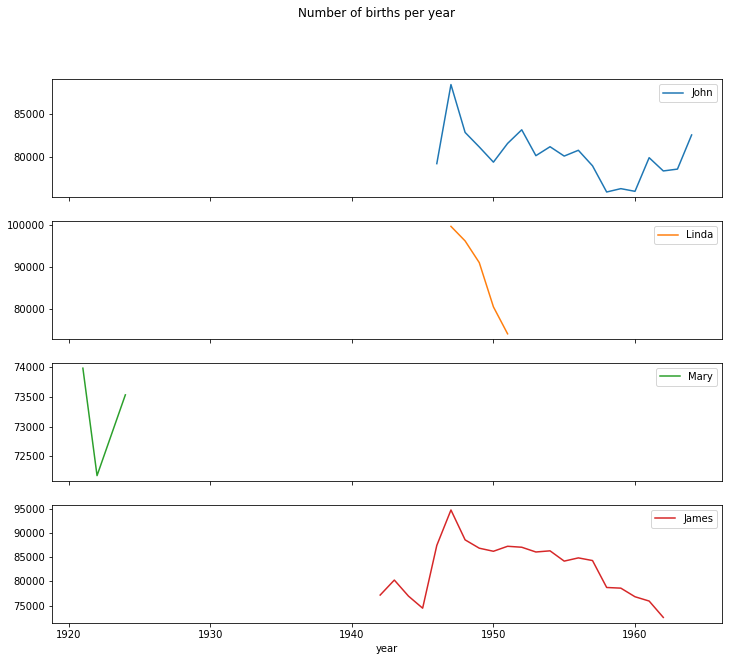

In [75]:
subset.plot(subplots=True, figsize=(12,10),grid=False,title='Number of births per year')

In [77]:
subsetw = total_births[['Linda']]

<AxesSubplot:title={'center':'Linda'}, xlabel='year'>

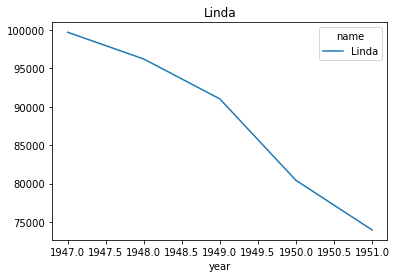

In [78]:
subsetw.plot(title='Linda')

In [79]:
table = top100.pivot_table('prop', index='year',columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Sum of table100.prop by year and sex'}, xlabel='year'>

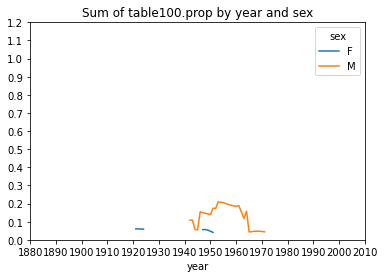

In [80]:
table.plot(title='Sum of table100.prop by year and sex', yticks=np.linspace(0,1.2,13), xticks=range(1880,2020,10))

In [83]:
df = boys[boys.year==1947]

In [84]:
df

,name,sex,births,year,prop
437172,James,M,94764,1947,0.051798
437173,Robert,M,91647,1947,0.050094
437174,John,M,88319,1947,0.048275


In [86]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [87]:
prop_cumsum[:10]

437172    0.051798
437173    0.101893
437174    0.150168
Name: prop, dtype: float64